<a href="https://colab.research.google.com/github/msibriani/information_retrieval_eq2/blob/main/Avance4_Equipo2_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

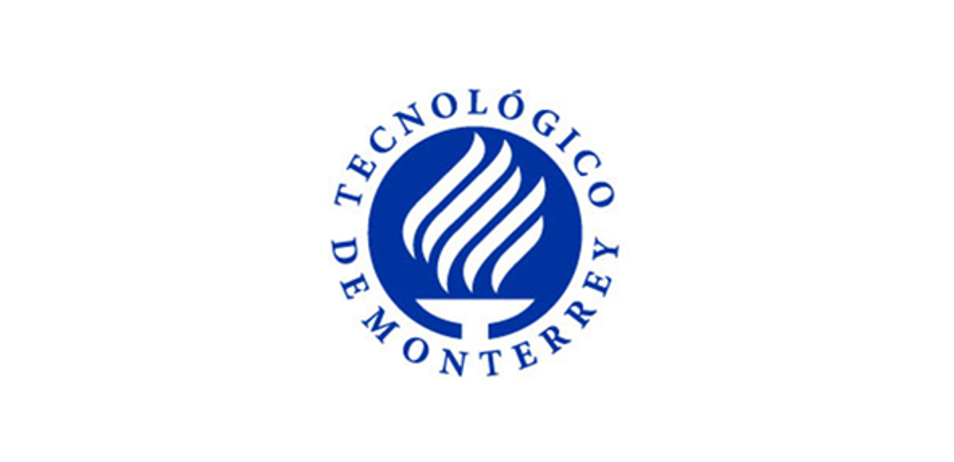

# MNA Maestr√≠a en Inteligencia Artificial Aplicada
# MNA Maestr√≠a en Inteligencia Artificial Aplicada

###Materia: TC5035.10 Proyecto Integrador
¬†(Gpo 10)



###Prof. Titulares:
###Dra. Grettel Barcel√≥ Alonso
###Dr. Luis Eduardo Falc√≥n Morales



###Avance 4. Otros Modelos.



###EQUIPO 2
###Alumnos - Matr√≠cula
###**Matthias Sibrian Illescas - A01794249**
###**Jos√© Ramiro Ad√°n Charles - A00174646**
###**Genaro Ramos Higuera - A00351269**

###Instalamos librerias de trabajo

In [1]:
!pip install haystack-ai
!pip install "sentence-transformers>=2.2.0"
!pip install pypdf

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 319.5/319.5 kB 1.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 320.6/320.6 kB 15.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41.3/41.3 kB 3.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.3/58.3 kB 3.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

Cargamos librerias y definimos los metodos para cargar en memoria los documentos y la conversion de los PDFs

In [1]:
from haystack.components.writers import DocumentWriter
from haystack.components.converters import PyPDFToDocument
from haystack.components.preprocessors import DocumentSplitter, DocumentCleaner
from haystack.components.routers import FileTypeRouter
from haystack.components.embedders import SentenceTransformersDocumentEmbedder
from haystack import Pipeline
from haystack.document_stores.in_memory import InMemoryDocumentStore

document_store = InMemoryDocumentStore()
file_type_router = FileTypeRouter(mime_types=["application/pdf"])
pdf_converter = PyPDFToDocument()


Definimos el metodo para limpiar los documentos

In [2]:
document_cleaner = DocumentCleaner()
document_splitter = DocumentSplitter(split_by="word", split_length=200, split_overlap=50)


Agregamos el embedder que utilizaremos en el Pipeline para los documentos que escribiremos en la document store.

In [3]:
document_embedder = SentenceTransformersDocumentEmbedder(model="sentence-transformers/all-MiniLM-L6-v2")
document_writer = DocumentWriter(document_store)


Ahora armamos la secuencia del Pipeline a aplicar a los documentos PDF

In [4]:
preprocessing_pipeline = Pipeline()
preprocessing_pipeline.add_component(instance=file_type_router, name="file_type_router")
preprocessing_pipeline.add_component(instance=pdf_converter, name="pypdf_converter")
preprocessing_pipeline.add_component(instance=document_cleaner, name="document_cleaner")
preprocessing_pipeline.add_component(instance=document_splitter, name="document_splitter")
preprocessing_pipeline.add_component(instance=document_embedder, name="document_embedder")
preprocessing_pipeline.add_component(instance=document_writer, name="document_writer")


Ahora conectamos el Pipeline:

In [5]:
preprocessing_pipeline.connect("file_type_router.application/pdf", "pypdf_converter.sources")
preprocessing_pipeline.connect("pypdf_converter", "document_cleaner")
preprocessing_pipeline.connect("document_cleaner", "document_splitter")
preprocessing_pipeline.connect("document_splitter", "document_embedder")
preprocessing_pipeline.connect("document_embedder", "document_writer")


üöÖ Components
  - file_type_router: FileTypeRouter
  - pypdf_converter: PyPDFToDocument
  - document_cleaner: DocumentCleaner
  - document_splitter: DocumentSplitter
  - document_embedder: SentenceTransformersDocumentEmbedder
  - document_writer: DocumentWriter
üõ§Ô∏è Connections
  - file_type_router.application/pdf -> pypdf_converter.sources (List[Path])
  - pypdf_converter.documents -> document_cleaner.documents (List[Document])
  - document_cleaner.documents -> document_splitter.documents (List[Document])
  - document_splitter.documents -> document_embedder.documents (List[Document])
  - document_embedder.documents -> document_writer.documents (List[Document])

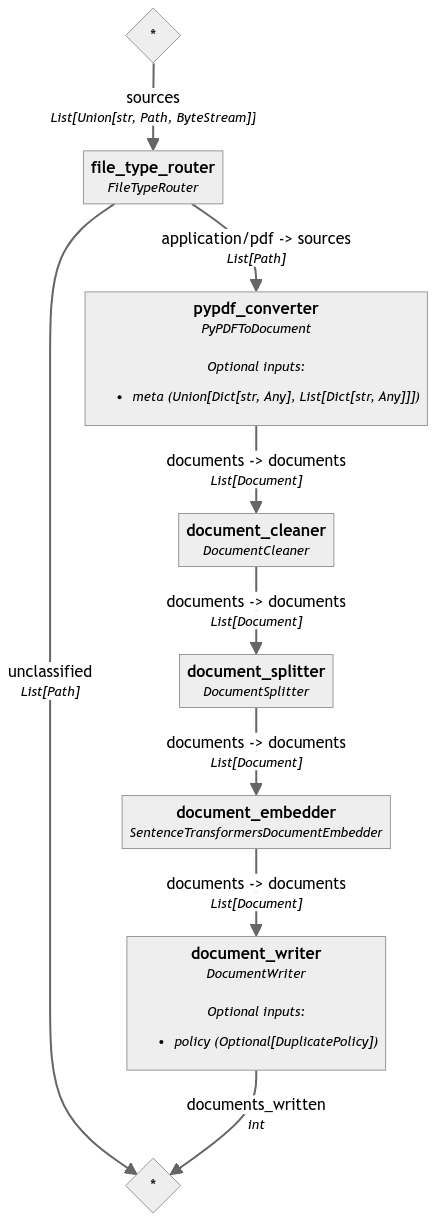

In [6]:
preprocessing_pipeline.show()

###Cargamos todos los documentos de la carpeta de PDFs /content/data/pdf
###y aplicamos el Pipeline de preprocesamiento

In [7]:
from pathlib import Path

carpeta_pdfs = "/content/data/pdf"
preprocessing_pipeline.run({"file_type_router": {"sources": list(Path(carpeta_pdfs).glob("**/*"))}})


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/149 [00:00<?, ?it/s]

{'document_writer': {'documents_written': 4756}}

Ahora utilizaremos el mismo embedder para las preguntas (questions) y poder hacer la recuperacion mediante el Retriever.

In [8]:
from haystack.components.embedders import SentenceTransformersTextEmbedder

text_embedder = SentenceTransformersTextEmbedder(model="sentence-transformers/all-MiniLM-L6-v2")


In [9]:
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever

retriever = InMemoryEmbeddingRetriever(document_store)


Ahora definimos el prompt builder para las preguntas y le decimos que tome el contexto de los documentos para generar las respuestas

In [10]:
from haystack.components.builders import PromptBuilder
#Given the following information, answer the question.
template = """
Create a concise and informative answer for a given question based solely on the given documents.
You must only use information from the given documents and cite the documents you used by mentioning
their file or document name in the answers.
For example, finish your answer with "Como se menciona en el documento: "

Context:
{% for document in documents %}
    {{ document.content }}
{% endfor %}

Question: {{question}}
Answer:
"""

prompt_builder = PromptBuilder(template=template)


Ahora cargamos el API Key para el LLM que utilizaremos:

In [11]:
import os
from getpass import getpass
from haystack.components.generators import OpenAIGenerator

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass("Enter OpenAI API key:")


Enter OpenAI API key:¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


In [12]:
generator = OpenAIGenerator(model="gpt-3.5-turbo")

In [13]:
basic_rag_pipeline = Pipeline()
# Adicionamos los componentes al pipeline
basic_rag_pipeline.add_component("text_embedder", text_embedder)
basic_rag_pipeline.add_component("retriever", retriever)
basic_rag_pipeline.add_component("prompt_builder", prompt_builder)
basic_rag_pipeline.add_component("llm", generator)

# Ahora los conectamos dentro del pipeline
basic_rag_pipeline.connect("text_embedder.embedding", "retriever.query_embedding")
basic_rag_pipeline.connect("retriever", "prompt_builder.documents")
basic_rag_pipeline.connect("prompt_builder", "llm")

üöÖ Components
  - text_embedder: SentenceTransformersTextEmbedder
  - retriever: InMemoryEmbeddingRetriever
  - prompt_builder: PromptBuilder
  - llm: OpenAIGenerator
üõ§Ô∏è Connections
  - text_embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> llm.prompt (str)

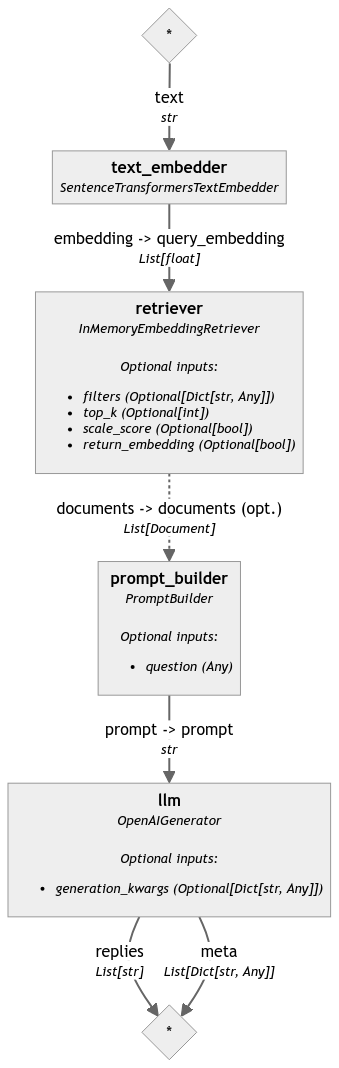

In [14]:
basic_rag_pipeline.show()

## Ahora haremos las siguientes preguntas al LLM y que se base en el contexcto de documentos

1. ¬øCu√°l es la definici√≥n exacta de un cr√©dito acad√©mico en nuestra instituci√≥n para los 3 niveles Preparatoria, Profesional y Posgrado?
2. ¬øC√≥mo se determina la equivalencia de un cr√©dito acad√©mico en t√©rminos de horas de trabajo del estudiante (lecturas, pr√°cticas, estudio independiente, etc.)?
3. ¬øQu√© normativas nacionales o internacionales estamos siguiendo para la asignaci√≥n de cr√©ditos acad√©micos?
4. ¬øCu√°l es el proceso para evaluar y asignar cr√©ditos a un nuevo curso o programa acad√©mico?
5. ¬øC√≥mo se aseguran los est√°ndares de calidad y coherencia en la asignaci√≥n de cr√©ditos a trav√©s de diferentes departamentos y programas?
6. ¬øC√≥mo se calcula la carga de trabajo del estudiante para determinar el n√∫mero de cr√©ditos de un curso?
7. ¬øSe considera la carga de trabajo fuera del aula (como tareas y proyectos) al asignar cr√©ditos?
8. ¬øDe qu√© manera se comunica a los estudiantes la informaci√≥n sobre la cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada?
9. ¬øC√≥mo se garantiza la comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional?
10. ¬øCu√°l es el proceso para la transferencia de cr√©ditos de otras instituciones y c√≥mo se asegura su equivalencia?
11. ¬øC√≥mo influyen los cr√©ditos acad√©micos en el progreso y la planificaci√≥n acad√©mica de los estudiantes?
12. ¬øCon qu√© frecuencia se revisan y actualizan las pol√≠ticas de cr√©ditos acad√©micos?
13. ¬øQu√© criterios se utilizan para actualizar la asignaci√≥n de cr√©ditos en respuesta a cambios en el contenido del curso?
14. El cr√©dito acad√©mico representa las horas de dedicaci√≥n de un alumno en un curso bajo supervisi√≥n de un profesor y actividades independientes, ¬øcu√°l es la distribuci√≥n de horas en el c√°lculo de un cr√©dito?

In [15]:
question = "1. ¬øCu√°l es la definici√≥n exacta de un cr√©dito acad√©mico en nuestra instituci√≥n para los 3 niveles Preparatoria, Profesional y Posgrado?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Seg√∫n la informaci√≥n proporcionada en los documentos, en nuestra instituci√≥n un cr√©dito acad√©mico se define de la siguiente manera:
- Preparatoria: 3 cr√©ditos acad√©micos equivalen a 6 unidades acad√©micas.
- Profesional: 3 cr√©ditos acad√©micos equivalen a 8 unidades acad√©micas.
- Posgrado: 3 cr√©ditos acad√©micos equivalen a 12 unidades acad√©micas. 
Como se menciona en el documento: "Homologaci√≥n en la unidad de medici√≥n de carga acad√©mica"


In [17]:
question = "2. ¬øC√≥mo se determina la equivalencia de un cr√©dito acad√©mico en t√©rminos de horas de trabajo del estudiante (lecturas, pr√°cticas, estudio independiente, etc.)?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La equivalencia de un cr√©dito acad√©mico en t√©rminos de horas de trabajo del estudiante se determina en base a la suma de las horas clase y las horas de trabajo independiente. Por ejemplo, en el caso de tres cr√©ditos acad√©micos, esto equivale a 120 horas de trabajo. (Documento: POL√çTICAS Y NORMAS ACAD√âMICAS GENERALES) Como se menciona en el documento: "a la suma de las horas clase y las horas de trabajo independiente de tres cr√©ditos acad√©micos (120 horas)".


In [18]:
question = "3. ¬øQu√© normativas nacionales o internacionales estamos siguiendo para la asignaci√≥n de cr√©ditos acad√©micos?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Estamos siguiendo normativas nacionales e internacionales establecidas por la Direcci√≥n de Internacionalizaci√≥n y publicadas en el Reglamento para la Gesti√≥n y Operaci√≥n de Programas Internacionales, aplicable seg√∫n el nivel de estudios (Documento: Normativas acad√©micas generales - Art√≠culo 164 y Normativas acad√©micas generales - Art√≠culo 153). Tambi√©n se menciona que los convenios de cooperaci√≥n acad√©mica internacional son administrados, revisados y autorizados por la Direcci√≥n de Internacionalizaci√≥n, y se incluyen lineamientos para la modificaci√≥n o cancelaci√≥n de un convenio (Documento: Normativas acad√©micas generales - Art√≠culo 165). Como se menciona en los documentos mencionados.


In [19]:
uestion = "4. ¬øCu√°l es el proceso para evaluar y asignar cr√©ditos a un nuevo curso o programa acad√©mico?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Estamos siguiendo normativas internacionales establecidas por la Instituci√≥n, la Direcci√≥n de Internacionalizaci√≥n y la Vicerrector√≠a de Internacionalizaci√≥n para la asignaci√≥n de cr√©ditos acad√©micos en programas internacionales. Como se menciona en el documento "Normas Relacionadas con Programas Internacionales".


In [20]:
question = "5. ¬øC√≥mo se aseguran los est√°ndares de calidad y coherencia en la asignaci√≥n de cr√©ditos a trav√©s de diferentes departamentos y programas?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Los est√°ndares de calidad y coherencia en la asignaci√≥n de cr√©ditos a trav√©s de diferentes departamentos y programas se aseguran mediante la definici√≥n de la carga acad√©mica de tiempo completo para estudiantes por periodo regular, que es de 8 cr√©ditos con posibilidad de 2 cr√©ditos de sobrecarga. Adem√°s, se establecen los requisitos espec√≠ficos de unidades de formaci√≥n para programas de especialidades, maestr√≠as y doctorados, asegurando que el total de cr√©ditos acad√©micos sea similar entre los diferentes niveles de estudio (Documento: Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado).

Como se menciona en el documento: "Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado".


In [21]:
question = "6. ¬øC√≥mo se calcula la carga de trabajo del estudiante para determinar el n√∫mero de cr√©ditos de un curso?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La carga de trabajo del estudiante se calcula en funci√≥n del tiempo dedicado a la unidad de formaci√≥n para cumplir con los objetivos del curso. En el documento "POL√çTICAS Y NORMAS ACAD√âMICAS GENERALES", se menciona que los cr√©ditos acad√©micos representan tanto la asistencia a las horas-clase como el tiempo dedicado al trabajo independiente del alumno. Adem√°s, para los programas de salud con actividades cl√≠nicas, la carga acad√©mica se mide por el tiempo total que la unidad de formaci√≥n demande a los alumnos durante una semana. Como se menciona en el documento: "POL√çTICAS Y NORMAS ACAD√âMICAS GENERALES".


In [22]:
question = "7. ¬øSe considera la carga de trabajo fuera del aula (como tareas y proyectos) al asignar cr√©ditos?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

S√≠, la carga de trabajo fuera del aula, como tareas y proyectos, tambi√©n se considera al asignar cr√©ditos. Seg√∫n el documento "CORREO OFICIAL No. 08 ‚Äì 751 24 de", los cr√©ditos acad√©micos representan tanto la asistencia a las horas-clase como el tiempo dedicado al trabajo independiente del alumno. Adem√°s, se establece que la carga acad√©mica se mide por el tiempo total que la unidad de formaci√≥n demande a los alumnos durante una semana, lo cual incluye actividades fuera del aula. Como se menciona en el documento "CORREO OFICIAL No. 08 ‚Äì 751 24 de" y en "CORREO OFICIAL No. 08 ‚Äì 751 24 de".


In [23]:
question = "8. ¬øDe qu√© manera se comunica a los estudiantes la informaci√≥n sobre la cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La informaci√≥n sobre la cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada se comunica a los estudiantes a trav√©s de la definici√≥n de cr√©dito acad√©mico en posgrado, que incluye 15 horas de sesiones con el profesor m√°s 39 horas de trabajo independiente del estudiante, sumando un total de 54 horas durante el periodo acad√©mico. Adem√°s, se establece que cada unidad de formaci√≥n tiene 2 cr√©ditos y que la carga acad√©mica de tiempo completo var√≠a seg√∫n el periodo acad√©mico regular o intensivo (Documento: ASUNTO: Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado). Como se menciona en el documento: "ASUNTO: Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado".


In [24]:
question = "9. ¬øC√≥mo se garantiza la comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional se garantiza mediante la inclusi√≥n de la traducci√≥n de la escala de calificaciones de las universidades extranjeras a su equivalente en el Sistema Tecnol√≥gico de Monterrey en todos los convenios internacionales (Documento: "Convenios de cooperaci√≥n acad√©mica internacional"). Adem√°s, se establecen criterios claros de calificaci√≥n y carga acad√©mica para los alumnos que participen en programas internacionales, asegurando que la asignaci√≥n de calificaciones se realice de manera adecuada (Documento: "Programas internacionales en modalidad mixta"). Como se menciona en el documento: "Convenios de cooperaci√≥n acad√©mica internacional" y "Programas internacionales en modalidad mixta".


In [25]:
question = "10. Cu√°l es el proceso para la transferencia de cr√©ditos de otras instituciones y c√≥mo se asegura su equivalencia?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Para la transferencia de cr√©ditos de otras instituciones al Tecnol√≥gico de Monterrey, se debe mostrar la equivalencia de unidades por semestre utilizadas en la instituci√≥n de origen con el concepto de horas-cr√©dito por semestre del Tecnol√≥gico de Monterrey. Esto se calcula dividiendo el total de unidades del curso entre cuatro. Adem√°s, se debe cumplir con los est√°ndares establecidos de dedicaci√≥n por cr√©dito, donde la carga acad√©mica de tiempo completo por periodo regular es de 8 cr√©ditos, con la posibilidad de una sobrecarga de hasta 2 cr√©ditos. La decisi√≥n final de la equivalencia y transferencia de cr√©ditos se realiza a trav√©s de las pol√≠ticas y procedimientos establecidos por la instituci√≥n. (Archivo Documento de Pol√≠ticas y Normas Acad√©micas Generales) Como se menciona en el documento de Pol√≠ticas y Normas Acad√©micas Generales:  y en POL√çTICAS Y NORMAS ACAD√âMICAS GENERALES.


In [26]:
question = "11. ¬øC√≥mo influyen los cr√©ditos acad√©micos en el progreso y la planificaci√≥n acad√©mica de los estudiantes?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Los cr√©ditos acad√©micos son determinantes en el progreso y la planificaci√≥n acad√©mica de los estudiantes, ya que representan el tiempo dedicado a una materia o unidad de formaci√≥n, tanto en el aula como fuera de ella para lograr los objetivos de aprendizaje (documento "Y PROFESIONAL"). Esto es crucial para asegurar que el total de cr√©ditos en un semestre de un plan de estudios sea similar en todos los niveles educativos, desde preparatoria hasta posgrado (documento sin nombre). Adem√°s, la definici√≥n de cr√©ditos acad√©micos var√≠a seg√∫n el nivel educativo, con equivalencias espec√≠ficas para cada uno, lo que impacta en la carga acad√©mica y en la estructura de los programas de estudios (documentos "ASUNTO: Homologaci√≥n en la unidad de medici√≥n de carga acad√©mica" y "ASUNTO: Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado"). Esto se refleja en la necesidad de cumplir con est√°ndares establecidos de dedicaci√≥n por cr√©dito en cursos intensivos y en la distr

In [27]:
question = "12. ¬øCon qu√© frecuencia se revisan y actualizan las pol√≠ticas de cr√©ditos acad√©micos?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Las pol√≠ticas de cr√©ditos acad√©micos se revisan y actualizan regularmente, como se menciona en el documento "Homologaci√≥n en la unidad de medici√≥n de carga acad√©mica" donde se informa sobre la transici√≥n gradual hacia la unidad de medida de Cr√©ditos Acad√©micos en diferentes niveles educativos a partir de ciertas fechas espec√≠ficas. Esta actualizaci√≥n se llevar√° a cabo de manera progresiva en todos los programas acad√©micos. Como se menciona en el documento: "Homologaci√≥n en la unidad de medici√≥n de carga acad√©mica".


In [28]:
question = "13. ¬øQu√© criterios se utilizan para actualizar la asignaci√≥n de cr√©ditos en respuesta a cambios en el contenido del curso?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Se utilizan criterios como el n√∫mero de cr√©ditos reprobados y el promedio m√≠nimo requerido para la conservaci√≥n de la beca en el programa acad√©mico (Archivo: Reglamento_Academico). Como se menciona en el documento: "Se calcular√° de acuerdo al total de cr√©ditos acad√©micos reprobados en el periodo" (Archivo: Reglamento_Academico).


In [29]:
question = "14. El cr√©dito acad√©mico representa las horas de dedicaci√≥n de un alumno en un curso bajo supervisi√≥n de un profesor y actividades independientes, ¬øcu√°l es la distribuci√≥n de horas en el c√°lculo de un cr√©dito?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Seg√∫n el documento "Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado", la distribuci√≥n de horas en el c√°lculo de un cr√©dito acad√©mico es de 15 horas de sesiones con el profesor y 39 horas de trabajo independiente del estudiante, lo cual suma un total de 54 horas durante el periodo acad√©mico. Como se menciona en el documento "Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado":


## Ahora probamos con el LLM Mistral mistralai/Mixtral-8x7B-Instruct-v0.1

In [30]:
from haystack.components.generators import HuggingFaceAPIGenerator

if "HF_API_TOKEN" not in os.environ:
    os.environ["HF_API_TOKEN"] = getpass("Enter Hugging Face token:")

Enter Hugging Face token:¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


In [31]:

generator =HuggingFaceAPIGenerator(api_type="serverless_inference_api", api_params={"model": "mistralai/Mixtral-8x7B-Instruct-v0.1"})

In [32]:
question = "1. ¬øCu√°l es la definici√≥n exacta de un cr√©dito acad√©mico en nuestra instituci√≥n para los 3 niveles Preparatoria, Profesional y Posgrado?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

En nuestra instituci√≥n, un cr√©dito acad√©mico se define de la siguiente manera para los 3 niveles educativos:

- Preparatoria: 3 cr√©ditos acad√©micos equivalen a 6 unidades acad√©micas. (Documento: "Homologaci√≥n en la unidad de medici√≥n de carga acad√©mica")

- Profesional: 3 cr√©ditos acad√©micos equivalen a 8 unidades acad√©micas. (Documento: "Homologaci√≥n en la unidad de medici√≥n de carga acad√©mica")

- Posgrado: 3 cr√©ditos acad√©micos equivalen a 12 unidades acad√©micas. (Documento: "Homologaci√≥n en la unidad de medici√≥n de carga acad√©mica")

Como se menciona en el documento: "Homologaci√≥n en la unidad de medici√≥n de carga acad√©mica"


In [33]:
question = "2. ¬øC√≥mo se determina la equivalencia de un cr√©dito acad√©mico en t√©rminos de horas de trabajo del estudiante (lecturas, pr√°cticas, estudio independiente, etc.)?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La equivalencia de un cr√©dito acad√©mico en t√©rminos de horas de trabajo del estudiante se determina de la siguiente manera: un cr√©dito acad√©mico equivale a 15 horas de sesiones con el profesor m√°s 39 horas de trabajo independiente del estudiante, lo cual suma un total de 54 horas durante el periodo acad√©mico (Documento "ASUNTO: Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado"). Como se menciona en el documento: "ASUNTO: Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado".


In [34]:
question = "3. ¬øQu√© normativas nacionales o internacionales estamos siguiendo para la asignaci√≥n de cr√©ditos acad√©micos?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Estamos siguiendo las normativas nacionales e internacionales establecidas en el Reglamento para la Gesti√≥n y Operaci√≥n de Programas Internacionales, el cual es aplicable de acuerdo al nivel de estudios. Este reglamento, establecido por la Direcci√≥n de Internacionalizaci√≥n, incluye lineamientos para la asignaci√≥n de cr√©ditos acad√©micos en programas internacionales, tanto para los alumnos del Tecnol√≥gico de Monterrey como para los alumnos extranjeros que participen en dichos programas (Documento: "Programas Internacionales del Tecnol√≥gico de Monterrey" - Art√≠culo 164). Como se menciona en el documento: "CAP√çTULO VIII Normas Relacionadas con Programas Internacionales".


In [35]:
uestion = "4. ¬øCu√°l es el proceso para evaluar y asignar cr√©ditos a un nuevo curso o programa acad√©mico?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Estamos siguiendo normativas nacionales e internacionales para la asignaci√≥n de cr√©ditos acad√©micos, establecidas por la Direcci√≥n de Internacionalizaci√≥n y publicadas en el Reglamento para la Gesti√≥n y Operaci√≥n de Programas Internacionales (Archivo: Normas Acad√©micas Generales). Como se menciona en el documento: "Los convenios de cooperaci√≥n acad√©mica internacional son administrados, revisados y autorizados por la Direcci√≥n de Internacionalizaci√≥n" y "Los lineamientos y requisitos para realizar convenios de cooperaci√≥n acad√©mica internacional son establecidos por la Direcci√≥n de Internacionalizaci√≥n".


In [36]:
question = "5. ¬øC√≥mo se aseguran los est√°ndares de calidad y coherencia en la asignaci√≥n de cr√©ditos a trav√©s de diferentes departamentos y programas?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Los est√°ndares de calidad y coherencia en la asignaci√≥n de cr√©ditos se aseguran a trav√©s de la definici√≥n de un cr√©dito acad√©mico consistente en 15 horas de sesiones con el profesor m√°s 39 horas de trabajo independiente del estudiante, totalizando 54 horas por periodo acad√©mico (Documento: ASUNTO : Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado). Adem√°s, se establecen unidades de formaci√≥n de 2 cr√©ditos cada una para garantizar la equivalencia en todas las unidades de formaci√≥n entre los programas de profesional, maestr√≠a y doctorado (Documento: Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado). Este proceso es responsabilidad de las Escuelas y de los departamentos acad√©micos, as√≠ como de la Direcci√≥n de Posgrados y la Vicerrector√≠a de Innovaci√≥n Educativa y Normatividad Acad√©mica (Documento: Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado). Como se menciona en el documento: ASUNTO : Actualizaci√≥n de cr√©ditos y

In [37]:
question = "6. ¬øC√≥mo se calcula la carga de trabajo del estudiante para determinar el n√∫mero de cr√©ditos de un curso?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La carga de trabajo del estudiante para determinar el n√∫mero de cr√©ditos de un curso se calcula asignando un determinado n√∫mero de cr√©ditos acad√©micos a cada unidad de formaci√≥n, basado en el tiempo de trabajo que un alumno dedica a la unidad de formaci√≥n para cumplir con los objetivos del mismo. Este tiempo de trabajo incluye tanto la asistencia a las horas-clase como el tiempo dedicado al trabajo independiente del alumno. Esta asignaci√≥n de cr√©ditos acad√©micos se realiza de manera que el total de cr√©ditos en las unidades de formaci√≥n que integran un semestre de un plan de estudios sea similar en diferentes programas acad√©micos (Documento: Pol√≠ticas y Normas Acad√©micas Generales). Como se menciona en el documento: "Los cr√©ditos acad√©micos de una unidad de formaci√≥n representan el tiempo de trabajo que un alumno dedica a la unidad de formaci√≥n para cumplir con los objetivos del mismo."


In [38]:
question = "7. ¬øSe considera la carga de trabajo fuera del aula (como tareas y proyectos) al asignar cr√©ditos?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

S√≠, la asignaci√≥n de cr√©ditos tambi√©n considera la carga de trabajo fuera del aula, como tareas y proyectos, para cumplir con los objetivos de la unidad de formaci√≥n (Documento: "Art√≠culo 79"). Como se menciona en el documento: "Los cr√©ditos acad√©micos de una unidad de formaci√≥n representan el tiempo de trabajo que un alumno dedica a la unidad de formaci√≥n para cumplir con los objetivos del mismo."


In [39]:
question = "8. ¬øDe qu√© manera se comunica a los estudiantes la informaci√≥n sobre la cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada se comunica a los estudiantes a trav√©s de la definici√≥n de un cr√©dito acad√©mico, que incluye 15 horas de sesiones con el profesor m√°s 39 horas de trabajo independiente del estudiante, sumando un total de 54 horas durante el periodo acad√©mico (ASUNTO : Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado). Adem√°s, se establece que cada unidad de formaci√≥n tiene asignados 2 cr√©ditos (ASUNTO : Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado). Esta informaci√≥n se encuentra detallada en los documentos sobre la actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado. Como se menciona en el documento: "ASUNTO : Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado" y "A cada unidad de formaci√≥n se asignar√° un determinado n√∫mero de cr√©ditos acad√©micos."


In [40]:
question = "9. ¬øC√≥mo se garantiza la comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Se garantiza la comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional a trav√©s de la inclusi√≥n de la traducci√≥n de la escala de calificaciones de las universidades extranjeras a su equivalente en el Sistema Tecnol√≥gico de Monterrey, seg√∫n lo establecido en los convenios correspondientes (Archivo: "582"). Adem√°s, la Vicerrector√≠a Asociada de Internacionalizaci√≥n establece los lineamientos y requisitos para realizar convenios de cooperaci√≥n acad√©mica internacional, asegurando la calidad y reconocimiento de los cr√©ditos acad√©micos (Archivo: "592").Como se menciona en el documento: "582" y "592".


In [41]:
question = "10. Cu√°l es el proceso para la transferencia de cr√©ditos de otras instituciones y c√≥mo se asegura su equivalencia?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

El proceso para la transferencia de cr√©ditos de otras instituciones consiste en que las horas de trabajo correspondientes a los cursos pueden estimarse en horas-cr√©dito por semestre, de acuerdo con ciertos criterios establecidos. Por ejemplo, una hora de clase por semana de un curso semestral equivale a una hora-cr√©dito por semestre, y para cursos de investigaci√≥n o posgrado, las horas-cr√©dito se calculan dividiendo el total de unidades del curso entre cuatro. Adem√°s, se debe garantizar que el total de cr√©ditos acad√©micos en las unidades de formaci√≥n de un semestre de un plan de estudios sea similar al de programas de maestr√≠a y doctorado. (Documento: "Diploma Diploma de Doctorado en Educaci√≥n y Humanidades - Open Badge") Como se menciona en el documento:  "POL√çTICAS Y NORMAS ACAD√âMICAS GENERALES"


In [42]:
question = "11. ¬øC√≥mo influyen los cr√©ditos acad√©micos en el progreso y la planificaci√≥n acad√©mica de los estudiantes?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Los cr√©ditos acad√©micos tienen un impacto significativo en el progreso y la planificaci√≥n acad√©mica de los estudiantes. Seg√∫n el documento "ASUNTO: Homologaci√≥n en la unidad de medici√≥n de carga acad√©mica", se establece que la determinaci√≥n de los cr√©ditos acad√©micos en cada unidad de formaci√≥n se realiza de manera que el total de cr√©ditos de un semestre sea similar en todos los programas de estudio, ya sea de nivel preparatoria, profesional o posgrado. Esto asegura que los estudiantes cumplan con una carga acad√©mica equilibrada y comparable en todos los niveles educativos (Documento "POL√çTICAS Y NORMAS ACAD√âMICAS GENERALES" y "PROGRAMAS DE POSGRADO"). Adem√°s, los cr√©ditos acad√©micos tambi√©n determinan la duraci√≥n y la estructura de los programas de estudio, influyendo en la planificaci√≥n de los estudiantes y su progreso hacia la obtenci√≥n de un t√≠tulo espec√≠fico (Documento "ASUNTO: Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado"). Como se me

In [43]:
question = "12. ¬øCon qu√© frecuencia se revisan y actualizan las pol√≠ticas de cr√©ditos acad√©micos?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Las pol√≠ticas de cr√©ditos acad√©micos se revisan y actualizan de manera constante, como se menciona en el documento de "Homologaci√≥n en la unidad de medici√≥n de carga acad√©mica".


In [44]:
question = "13. ¬øQu√© criterios se utilizan para actualizar la asignaci√≥n de cr√©ditos en respuesta a cambios en el contenido del curso?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Los criterios utilizados para actualizar la asignaci√≥n de cr√©ditos en respuesta a cambios en el contenido del curso incluyen la definici√≥n de un cr√©dito acad√©mico como 15 horas de sesiones con el profesor m√°s 39 horas de trabajo independiente del estudiante, lo cual suma un total de 54 horas durante el periodo acad√©mico (Documento: "ASUNTO : Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado"). Como se menciona en el documento: "ASUNTO : Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado".


In [45]:
question = "14. El cr√©dito acad√©mico representa las horas de dedicaci√≥n de un alumno en un curso bajo supervisi√≥n de un profesor y actividades independientes, ¬øcu√°l es la distribuci√≥n de horas en el c√°lculo de un cr√©dito?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Seg√∫n el documento "Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado", un cr√©dito acad√©mico se calcula mediante 15 horas de sesiones con el profesor m√°s 39 horas de trabajo independiente del estudiante, lo cual suma un total de 54 horas durante el periodo acad√©mico. Esto se menciona en el documento "Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado".


## Ahora probamos con el LLM Cohere "CohereForAI/aya-23-8B"

In [46]:
generator =HuggingFaceAPIGenerator(api_type="serverless_inference_api", api_params={"model": "CohereForAI/aya-23-8B"})

In [48]:
question = "1. ¬øCu√°l es la definici√≥n exacta de un cr√©dito acad√©mico en nuestra instituci√≥n para los 3 niveles Preparatoria, Profesional y Posgrado?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Seg√∫n los documentos, en nuestra instituci√≥n, un cr√©dito acad√©mico se define de la siguiente manera:
- En Preparatoria, 3 cr√©ditos acad√©micos equivalen a 6 unidades acad√©micas.
- En Profesional, 3 cr√©ditos acad√©micos equivalen a 8 unidades acad√©micas.
- En Posgrado, 3 cr√©ditos acad√©micos equivalen a 12 unidades acad√©micas (Documento: "CONV-082021-COM- 006 - Documento de ejecuci√≥n" y "CONV-082021-COM- 006 - Documento de ejecuci√≥n"). Como se menciona en el documento: "CONV-082021-COM- 006 - Documento de ejecuci√≥n"


In [49]:
question = "2. ¬øC√≥mo se determina la equivalencia de un cr√©dito acad√©mico en t√©rminos de horas de trabajo del estudiante (lecturas, pr√°cticas, estudio independiente, etc.)?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Un cr√©dito acad√©mico se determina en t√©rminos de horas de trabajo del estudiante, tanto en clase como de forma independiente. Por ejemplo, en el caso de los programas de posgrado, un cr√©dito acad√©mico equivale a 15 horas de sesiones con el profesor y 39 horas de trabajo independiente del estudiante, totalizando 54 horas durante el periodo acad√©mico (Documento: "ASUNTO : Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado"). Como se menciona en el documento: "ASUNTO : Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado".


In [50]:
question = "3. ¬øQu√© normativas nacionales o internacionales estamos siguiendo para la asignaci√≥n de cr√©ditos acad√©micos?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Estamos siguiendo normativas nacionales e internacionales establecidas por la Direcci√≥n de Internacionalizaci√≥n, la Vicerrector√≠a Asociada de Internacionalizaci√≥n y la Organizaci√≥n de Naciones Unidas para la asignaci√≥n de cr√©ditos acad√©micos (Archivo 164, Archivo 153). Como se menciona en el documento: "Los lineamientos y requisitos para realizar convenios de cooperaci√≥n acad√©mica internacional son establecidos por la Direcci√≥n de Internacionalizaci√≥n y publicados en el Reglamento para la Gesti√≥n y Operaci√≥n de Programas Internacionales aplicable de acuerdo al nivel de estudios" (Archivo 164).


In [51]:
uestion = "4. ¬øCu√°l es el proceso para evaluar y asignar cr√©ditos a un nuevo curso o programa acad√©mico?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Estamos siguiendo los lineamientos y requisitos establecidos por la Direcci√≥n de Internacionalizaci√≥n y publicados en el Reglamento para la Gesti√≥n y Operaci√≥n de Programas Internacionales aplicable seg√∫n el nivel de estudios (Archivo: "Normativas de Programas Internacionales del ITESM"). Como se menciona en el documento: "Los lineamientos y requisitos para realizar convenios de cooperaci√≥n acad√©mica internacional son establecidos por la Direcci√≥n de Internacionalizaci√≥n y publicados en el Reglamento para la Gesti√≥n y Operaci√≥n de Programas Internacionales aplicable de acuerdo al nivel de estudios."


In [52]:
question = "5. ¬øC√≥mo se aseguran los est√°ndares de calidad y coherencia en la asignaci√≥n de cr√©ditos a trav√©s de diferentes departamentos y programas?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Los est√°ndares de calidad y coherencia en la asignaci√≥n de cr√©ditos se aseguran mediante la definici√≥n de la carga acad√©mica de tiempo completo por periodo regular, que es de 8 cr√©ditos y hasta 2 cr√©ditos de sobrecarga, y 4 cr√©ditos para periodo intensivo, seg√∫n el documento "Programas de Posgrado". Adem√°s, se establece que cada unidad de formaci√≥n se imparte a raz√≥n de tres horas-clase por semana y se asigna un determinado n√∫mero de cr√©ditos acad√©micos, asegurando que el total de cr√©ditos en un semestre sea similar en todos los programas de estudio, como se menciona en el documento "Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado". Como se menciona en el documento "Programas de Posgrado" y "Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado":


In [53]:
question = "6. ¬øC√≥mo se calcula la carga de trabajo del estudiante para determinar el n√∫mero de cr√©ditos de un curso?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La carga de trabajo del estudiante para determinar el n√∫mero de cr√©ditos de un curso se calcula en base al tiempo total que la unidad de formaci√≥n demande a los alumnos durante una semana. A cada curso se le asignar√° un n√∫mero espec√≠fico de unidades, que ser√° menor que el n√∫mero total de horas de trabajo a la semana. Esto se establece para que el total de unidades de los cursos en un semestre sea similar a los de un semestre de otros programas de nivel profesional, maestr√≠a y doctorado. Como se menciona en el documento "Art√≠culo 79 del Reglamento de Becas y Pr√©stamos Educativos para los Alumnos de Preparatoria y Profesional".


In [54]:
question = "7. ¬øSe considera la carga de trabajo fuera del aula (como tareas y proyectos) al asignar cr√©ditos?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

S√≠, se considera la carga de trabajo fuera del aula al asignar cr√©ditos, ya que los cr√©ditos acad√©micos representan tanto la asistencia a las horas-clase como el tiempo dedicado al trabajo independiente del alumno (Documento: "CORREO OFICIAL No. 08 ‚Äì 751 24 de"). Como se menciona en el documento: "Los cr√©ditos acad√©micos representan tanto la asistencia a las horas-clase como el tiempo dedicado al trabajo independiente del alumno" (Documento: "CORREO OFICIAL No. 08 ‚Äì 751 24 de").


In [55]:
question = "8. ¬øDe qu√© manera se comunica a los estudiantes la informaci√≥n sobre la cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La informaci√≥n sobre la cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada se comunica a los estudiantes mediante la definici√≥n de un cr√©dito acad√©mico que consta de 15 horas de sesiones con el profesor m√°s 39 horas de trabajo independiente del estudiante, totalizando 54 horas por periodo acad√©mico (Documento: ASUNTO : Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado). Adem√°s, cada unidad de formaci√≥n se asigna un determinado n√∫mero de cr√©ditos acad√©micos de acuerdo con las horas de dedicaci√≥n total de cada cr√©dito (Documento: ASUNTO : Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado). Como se menciona en el documento.


In [56]:
question = "9. ¬øC√≥mo se garantiza la comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional se garantiza a trav√©s de la traducci√≥n de la escala de calificaciones a su equivalente con el Sistema Tecnol√≥gico de Monterrey, establecido en los convenios con universidades extranjeras (documento: "Homologaci√≥n en la unidad de medici√≥n de carga acad√©mica"). Como se menciona en el documento: "Dado que el Sistema Tecnol√≥gico de Monterrey tiene s√≥lo convenios internacionales firmados con universidades extranjeras cuyos est√°ndares acad√©micos son similares, se considera que la calificaci√≥n m√≠nima aprobatoria en la universidad extranjera es equivalente a la calificaci√≥n m√≠nima aprobatoria del Instituto".


In [57]:
question = "10. Cu√°l es el proceso para la transferencia de cr√©ditos de otras instituciones y c√≥mo se asegura su equivalencia?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

El proceso de transferencia de cr√©ditos de otras instituciones se realiza a trav√©s de la evaluaci√≥n de los programas de estudio de dichas instituciones y la determinaci√≥n de la equivalencia de unidades de formaci√≥n por parte del Tecnol√≥gico de Monterrey. Para asegurar la equivalencia, se considera el tiempo de trabajo que un alumno dedica a cada unidad de formaci√≥n, tanto en asistencia a horas-clase como en trabajo independiente, con el objetivo de que el total de cr√©ditos acad√©micos en las unidades de formaci√≥n transferidas sea similar al de un semestre en los planes de estudio de profesional, maestr√≠a y doctorado. (Documento "POL√çTICAS Y NORMAS ACAD√âMICAS GENERALES") Como se menciona en el documento: "POL√çTICAS Y NORMAS ACAD√âMICAS GENERALES".


In [58]:
question = "11. ¬øC√≥mo influyen los cr√©ditos acad√©micos en el progreso y la planificaci√≥n acad√©mica de los estudiantes?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Los cr√©ditos acad√©micos influyen en el progreso y la planificaci√≥n acad√©mica de los estudiantes al determinar la carga de trabajo que deben cumplir en cada unidad de formaci√≥n, tanto dentro como fuera del aula, para lograr los objetivos de aprendizaje establecidos. Adem√°s, la asignaci√≥n de cr√©ditos acad√©micos se realiza de manera que el total de cr√©ditos en un semestre de un plan de estudios sea similar en programas de preparatoria, profesional, maestr√≠a y doctorado (Documento: POL√çTICAS Y NORMAS ACAD√âMICAS GENERALES). Esta asignaci√≥n var√≠a seg√∫n el nivel educativo, por ejemplo, en la preparatoria 3 cr√©ditos equivalen a 6 unidades acad√©micas, en el profesional 3 cr√©ditos equivalen a 8 unidades acad√©micas, y en el posgrado 3 cr√©ditos equivalen a 12 unidades acad√©micas (Documento: Programas de Posgrado). Como se menciona en el documento: "POL√çTICAS Y NORMAS ACAD√âMICAS GENERALES" y "Programas de Posgrado".


In [59]:
question = "12. ¬øCon qu√© frecuencia se revisan y actualizan las pol√≠ticas de cr√©ditos acad√©micos?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Las pol√≠ticas de cr√©ditos acad√©micos se revisan y actualizan de manera regular, como se menciona en el documento "ASUNTO : Homologaci√≥n en la unidad de medici√≥n de carga acad√©mica".


In [60]:
question = "13. ¬øQu√© criterios se utilizan para actualizar la asignaci√≥n de cr√©ditos en respuesta a cambios en el contenido del curso?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Los criterios para actualizar la asignaci√≥n de cr√©ditos en respuesta a cambios en el contenido del curso se basan en la definici√≥n de un cr√©dito acad√©mico, que consiste en 15 horas de sesiones con el profesor m√°s 39 horas de trabajo independiente del estudiante, lo cual da un total de 54 horas durante el periodo acad√©mico (Archivo: Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado). Como se menciona en el documento: "ASUNTO: Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado".


In [61]:
question = "14. El cr√©dito acad√©mico representa las horas de dedicaci√≥n de un alumno en un curso bajo supervisi√≥n de un profesor y actividades independientes, ¬øcu√°l es la distribuci√≥n de horas en el c√°lculo de un cr√©dito?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Seg√∫n el documento "Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado", la distribuci√≥n de horas en el c√°lculo de un cr√©dito acad√©mico es de 15 horas de sesiones con el profesor m√°s 39 horas de trabajo independiente del estudiante, totalizando 54 horas en total durante el periodo acad√©mico. Como se menciona en el documento "Actualizaci√≥n de cr√©ditos y estructura de Programas de Posgrado".
